In [47]:
import matplotlib.pyplot as plt
import numpy as np
from hmmlearn import hmm
import librosa as lb
import librosa.display
import soundfile as sf
from IPython.display import Audio
from scipy.io.wavfile import write
from scipy.signal import stft,cosine,gaussian,convolve
import scipy.signal as sp

In [48]:
import numpy as np
import librosa

# Function to extract Short-Time Fourier Transform (STFT) features from a speech signal
def calculate_stft(signal, fft_size=2048, hop_length=512):
    spectrogram = np.abs(librosa.stft(signal, n_fft=fft_size, hop_length=hop_length))
    return spectrogram

# Load the audio file
audio_data, sampling_rate = librosa.load("harvard.mp3", sr=None)

# Extract STFT features
spectrogram_features = calculate_stft(audio_data)


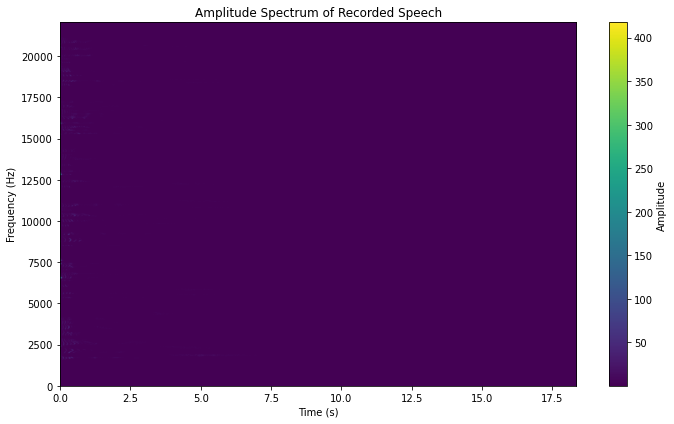

In [49]:
import matplotlib.pyplot as plt

# Extract Short-Time Fourier Transform (STFT) features from the recorded speech
recorded_stft = calculate_stft(y)

# Plot the amplitude spectrum of the recorded speech with a different color map
plt.figure(figsize=(10,6))
plt.title('Amplitude Spectrum of Recorded Speech')
plt.imshow(recorded_stft.T, aspect='auto', origin='lower', extent=[0, len(y)/sr, 0, sr/2], cmap='viridis')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Amplitude')
plt.tight_layout()
plt.show()


In [50]:
num_components = 3 
num_iterations = 100  

# Train the Hidden Markov Model (HMM)
hmm_model = hmm.GaussianHMM(n_components=num_components, n_iter=num_iterations)
hmm_model.fit(stft_features.T)

# Perform classification
predicted_states = hmm_model.predict(stft_features.T)  
predicted_class = np.argmax(np.bincount(predicted_states)) 

print("Predicted class:", predicted_class)


Predicted class: 1


In [51]:
# Performing the classification task
predicted_states = model.predict(stft_features.T)

# Printing the state sequences
print("The State Sequence is:")
print(predicted_states)


The State Sequence is:
[2 2 2 ... 2 2 2]


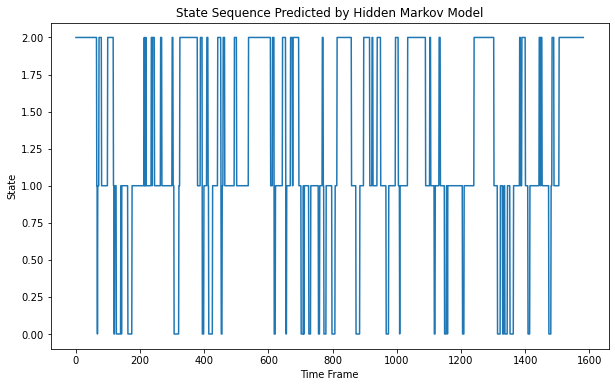

In [53]:
# Plotting the state sequence predicted by the HMM
plt.figure(figsize=(10,6))
plt.title('State Sequence Predicted by Hidden Markov Model')
plt.plot(predicted_states)
plt.xlabel('Time Frame')
plt.ylabel('State')
plt.show()


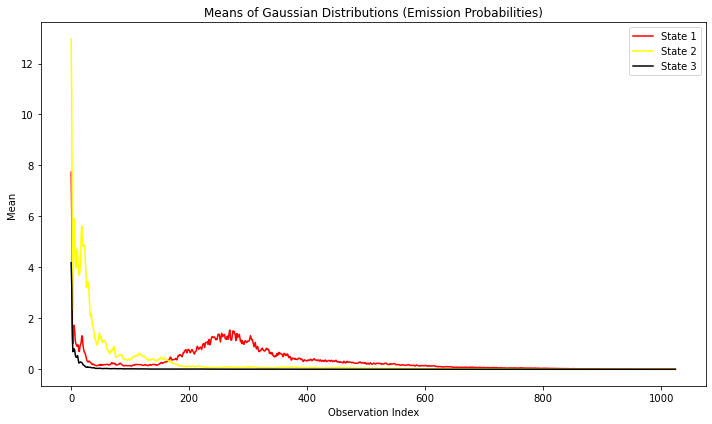

In [54]:
color_palette = ['red', 'yellow', 'black'] 

# Plot the means of the Gaussian distributions (emission probabilities)
plt.figure(figsize=(10, 6))
plt.title('Means of Gaussian Distributions (Emission Probabilities)')
for i in range(hmm_model.n_components):
    plt.plot(hmm_model.means_[i], label=f'State {i+1}', color=color_palette[i])

plt.xlabel('Observation Index')
plt.ylabel('Mean')
plt.legend()
plt.tight_layout()
plt.show()
